# Simple FIR-filter demo

Illustrates the simpe FIR bandpass-filter in McClellan et al., Ch. 9-7.3,  *A Bandpass Filter with Real Coefficients*.
The filter coefficients $b_k$ of the bandpass are filter are 
\begin{align}
  b_k &= cos(\hat \omega_0 (k-k_m))  & k &= 0, 1, \ldots L-1  \quad ,
\end{align}
where $\hat \omega_0$ is the centre frequency of the filter, $L$ is the length of the filter, and $k_m=\tfrac12 (L-1)$ is the midponit of the filter. This choice ensures that the filter coefficients are symmetric around the midpoint, which is necessary to obtain a linear phase. 

The centre frequency $\hat \omega_0$ is specified relative to the length of the filter $L$ from the parameter $k_0$ by 
\begin{align}
  \hat \omega_0= 2 \pi \frac{k_0}{L} \quad .
\end{align}
If $k_0$ is an integer, $\hat \omega_0$ will be at one of the zeros in the corresponding running-average filter.

The running sum example in Ch. 9-6.4 in [1], Figures 9-11 and 9-12, is obtained by setting $L=11$ and $k_0=0$.

The bandpass filter example in Ch. 9-7.3 in [1], Figures 9-17 and 9-18, is obtained by setting $L=11$ and $k_0=2.5$.



#### Reference
[1]  J. H McClellan, R. W. Schafer, M. A. Yoder, *DSP First*, Pearson, 2016





Label(value='Simple bandpass FIR-filter', style=LabelStyle(font_weight='bold'))

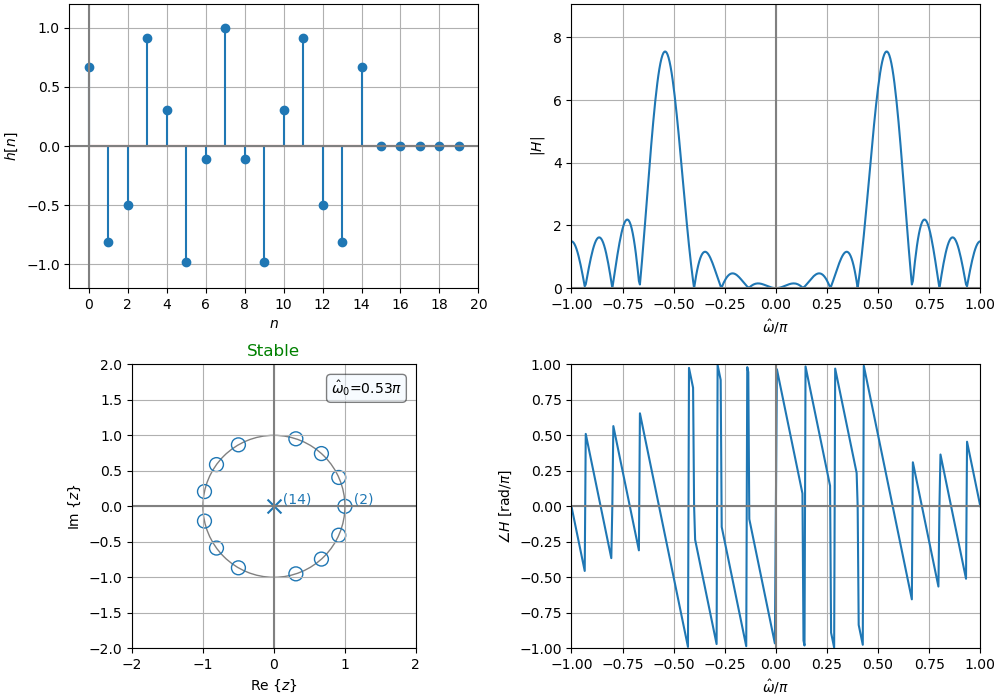

In [2]:
# Use Matplotlib backend that allows interactive operation
%matplotlib ipympl

# Modules
import numpy as np
from math import pi
import ipywidgets as widgets

# Filter calculation and plotting
import filter_response

#######################################################################################
#  Function to run the demo interactively
def run_demo(L, k0):

    print(L)
    w0= 2*pi*k0/L;
    print(w0)

    k = np.arange(0, L)
    km = 1/2 * (L-1)
    filt.b = np.cos(w0*(k-km))
    filt.a = [1]
    print(filt.b)
    print(filt.a)
    
    filt.plot(print_coefficients=False, textstr=rf'$\hat \omega_0$={w0/pi:.2f}$\pi$')
    
    return    

#######################################################################################
# Define widgets
w_layout = widgets.Layout(width='80%')
widget_style = {'description_width': 'initial'}

title_widget = widgets.Label("Simple bandpass FIR-filter", style=dict(font_weight='bold'))

width  = '10%'

L_widget = widgets.IntText(min=1, max=50.0,  value=15, 
                                 description= " $L$ ", 
                                 layout=widgets.Layout(width=width), 
                                 style=widget_style)

k0_widget = widgets.FloatText(min=0, max=50.0,  value=4, step=0.1,
                                 description= " $k_0$ ", 
                                 layout=widgets.Layout(width=width), 
                                 style=widget_style)

grid_widget = widgets.VBox([L_widget, k0_widget])

# Create lines of parameter widgets 
display(title_widget)
display(grid_widget)

filt = filter_response.FilterResponse()

# Call display function interactively
w = widgets.interactive(run_demo, L=L_widget, k0=k0_widget)